In [29]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [30]:
df = pd.read_csv("cleaned_dataset.csv")

In [31]:
df.shape

(536, 6)

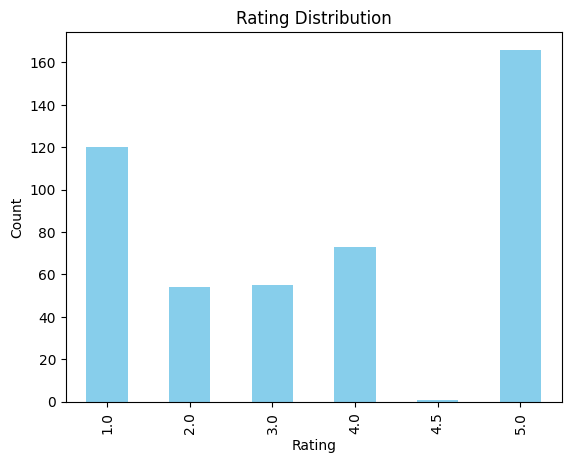

In [32]:
#rating distribution
df['stars'].value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.title("Rating Distribution")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()

The graph shows a **clear upward trend**, with counts steadily increasing from rating 1 to rating 5. This indicates that the majority of customers gave **high ratings**, suggesting overall positive satisfaction with the experience.

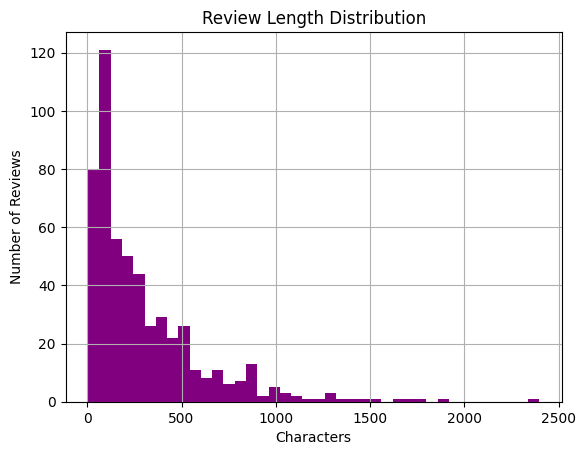

,stars,review_length
stars,1.000000,-0.080813
review_length,-0.080813,1.000000


In [33]:
#review length
df['review_length'] = df['text'].str.len()

df['review_length'].hist(bins=40, color='purple')
plt.title("Review Length Distribution")
plt.xlabel("Characters")
plt.ylabel("Number of Reviews")
plt.show()

# Correlation with rating?
df[['stars', 'review_length']].corr()

The distribution shows that **most reviews are short**, clustered below 200 characters, with the highest concentration under 100 characters. A few outliers with much longer lengths exist, but they are rare, indicating that customers generally leave concise feedback.


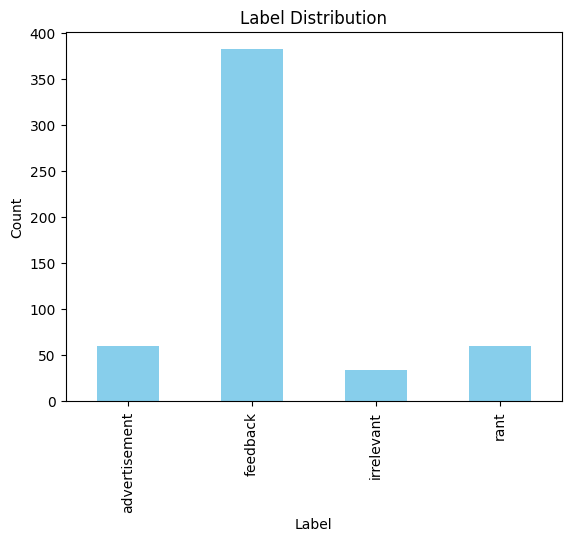

In [34]:
# label distribution
df['label'].value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.title("Label Distribution")
plt.xlabel("Label")
plt.ylabel("Count")
plt.show()

The graph shows that **Feedback dominate the dataset**, far outnumbering the other categories. In contrast, **Advertisement, Irrelevant Content, and Rant** appear in much smaller but relatively similar amounts, indicating a strong class imbalance.

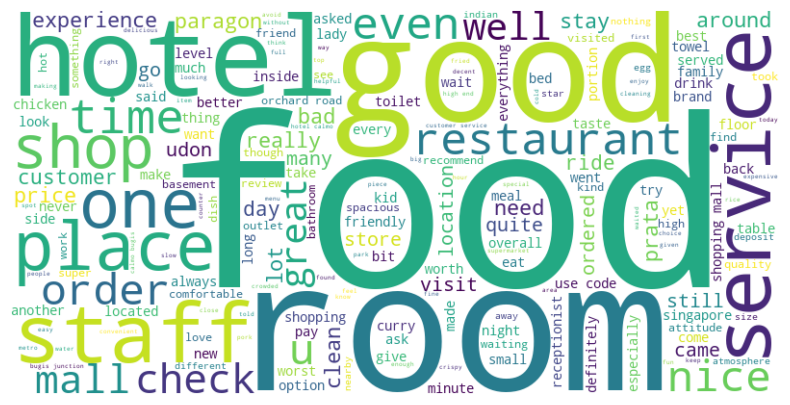

In [35]:
# most used words
# Join all processed text into one big string
text = " ".join(df["processed_text"].dropna())

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

The word cloud reveals that terms like “food,” “good,” “staff,” and “place” dominate the reviews, indicating that customers frequently focus on food quality, staff interactions, and the overall environment. Words such as “taste,” “service,” “delicious,” and “nice” suggest a generally positive dining experience, while mentions of “price,” “bad,” and “toilet” highlight occasional concerns about cost, negative experiences, or hygiene.

This mix of positive and critical keywords suggests that while most reviews emphasize satisfaction with food and service, there are also recurring complaints related to pricing and facilities.